In [11]:
import numpy as np
import pandas as pd
import math
from scipy import stats
import matplotlib.pyplot as plt

In [12]:

songs_data = pd.read_csv("../data/spotify-tracks.csv", index_col=0)
songs_data['track_genre'] = songs_data['track_genre'].astype('category')
songs_data.dtypes

track_id              object
artists               object
album_name            object
track_name            object
popularity             int64
duration_ms            int64
explicit                bool
danceability         float64
energy               float64
key                    int64
loudness             float64
mode                   int64
speechiness          float64
acousticness         float64
instrumentalness     float64
liveness             float64
valence              float64
tempo                float64
time_signature         int64
track_genre         category
dtype: object

In [13]:
songs_data.sort_values('popularity', ascending=False)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
20001,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,-7.375,1,0.0864,0.013000,0.000005,0.2660,0.238,131.121,4,dance
81051,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,-7.375,1,0.0864,0.013000,0.000005,0.2660,0.238,131.121,4,pop
51664,2tTmW7RDtMQtBk7m2rYeSw,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,False,0.621,0.782,2,-5.548,1,0.0440,0.012500,0.033000,0.2300,0.550,128.033,4,hip-hop
81210,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,7,-3.673,0,0.0343,0.003830,0.000007,0.3710,0.304,128.040,4,pop
89411,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,7,-5.329,0,0.0364,0.583000,0.000002,0.2180,0.850,124.980,4,reggaeton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95148,34olARXYeAnlabWyWtpGxe,Edgar Joel;Anthony Colon,Era Salsa para Bailar,Hasta El Sol De Hoy,0,281960,False,0.585,0.761,2,-9.441,1,0.0321,0.537000,0.000146,0.1040,0.828,167.971,4,salsa
95145,6abSq0hivs5RJtraGRKKhS,Ray Barretto,Era Salsa para Bailar,Descarga La Moderna,0,266600,False,0.703,0.510,8,-13.915,1,0.0454,0.800000,0.394000,0.0879,0.858,113.211,4,salsa
68256,1U6K8MHPdkqaBoJOfhXjPx,Jhayco,Reggeaton Imperdible,Sensual Bebé,0,209146,True,0.776,0.629,0,-6.090,1,0.0505,0.026800,0.000000,0.1140,0.104,97.066,4,latino
68252,5Mktfl3xR4CNPO0u5QZRal,Jhayco;Bad Bunny,Bájale como 7500,CÓMO SE SIENTE - Remix,0,227520,True,0.807,0.606,3,-8.871,0,0.0872,0.094600,0.000000,0.1190,0.304,92.988,4,latino


In [14]:
features = [
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature']
songs_data.columns



Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

,feature,correlation
2,danceability,0.180439
1,explicit,0.083526
7,speechiness,0.051956
8,acousticness,0.032274
13,time_signature,0.031033
5,loudness,0.026517
10,liveness,0.018901
12,tempo,-0.025894
3,energy,-0.033164
4,key,-0.051328


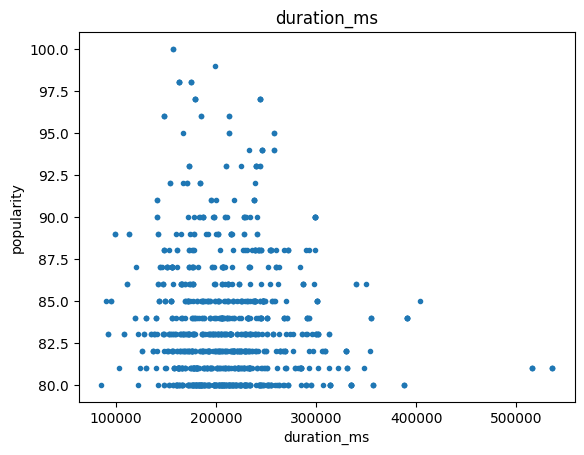

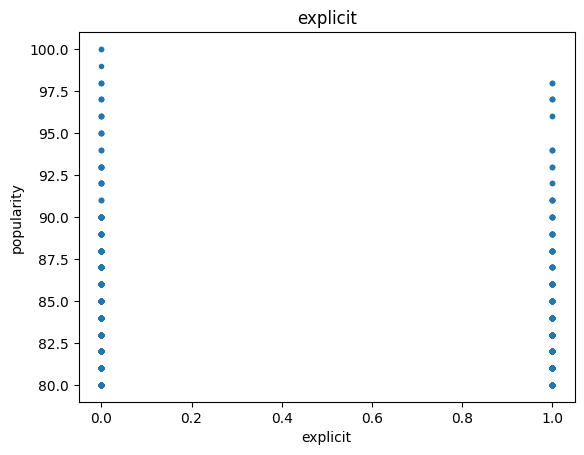

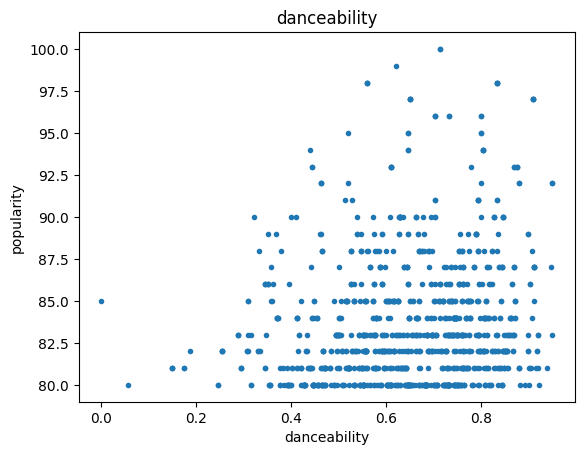

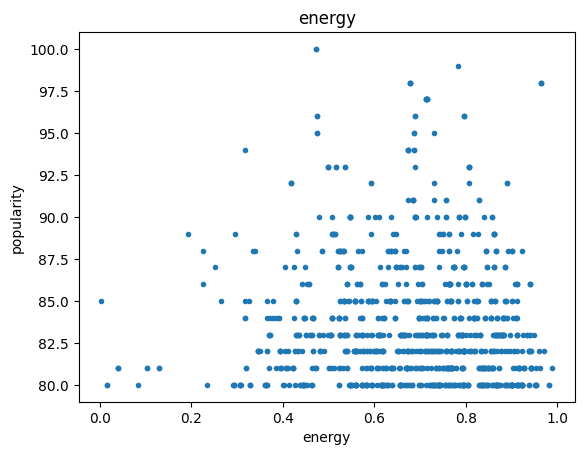

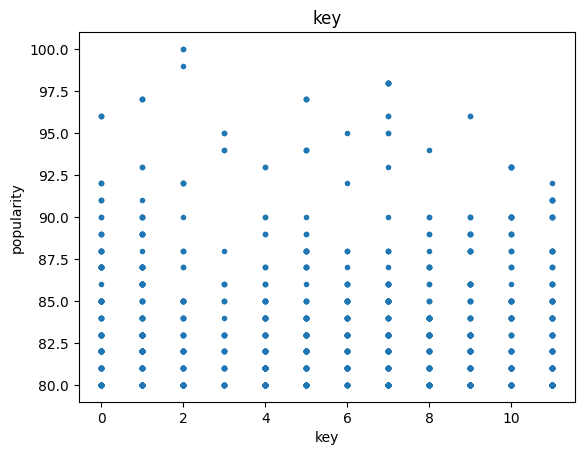

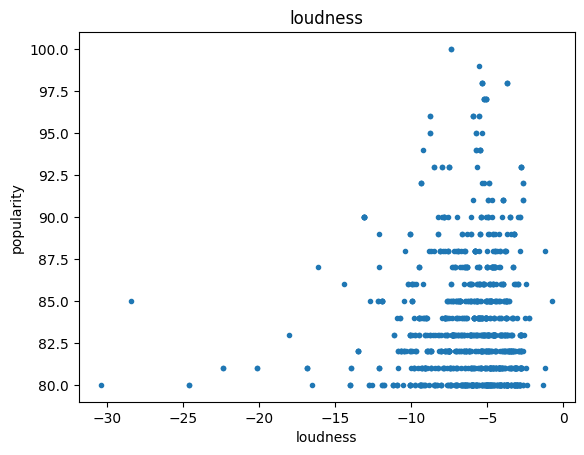

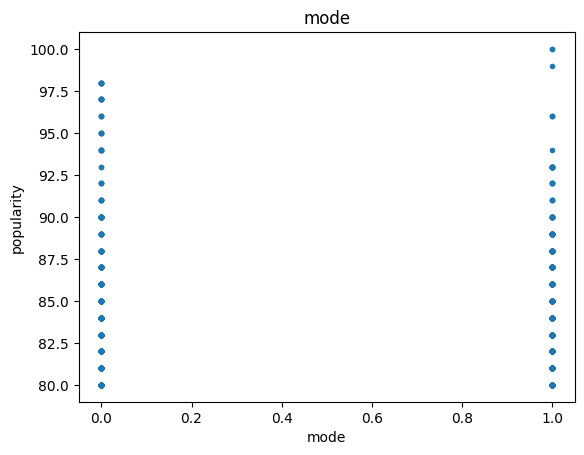

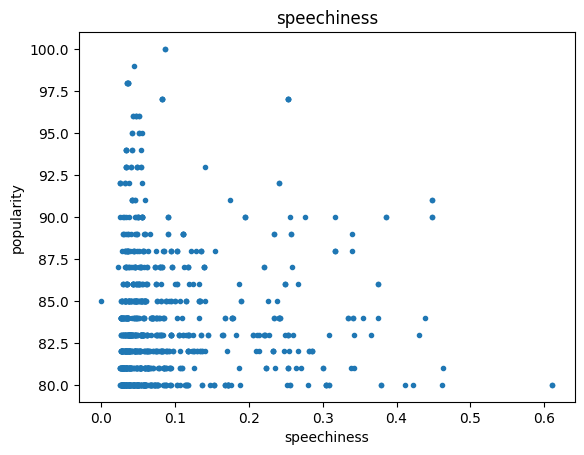

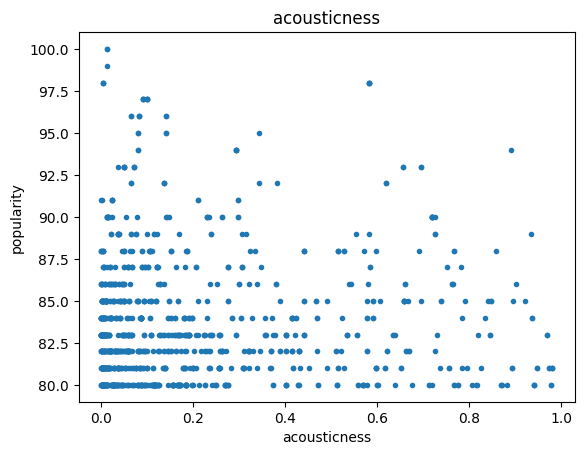

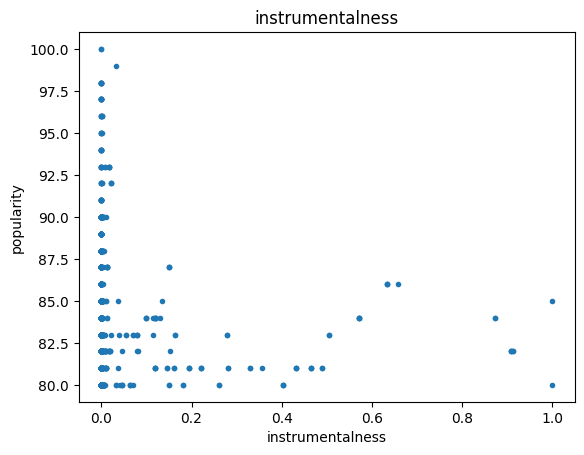

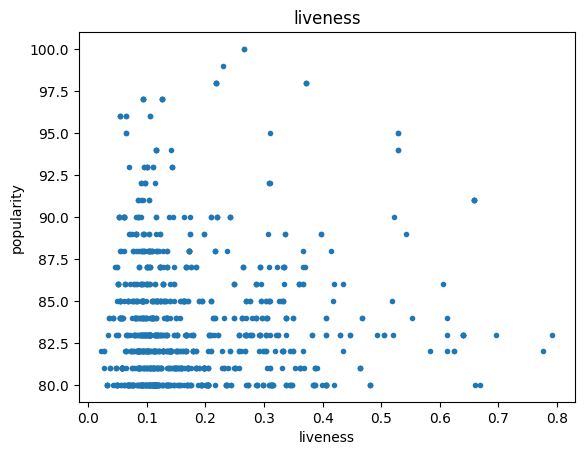

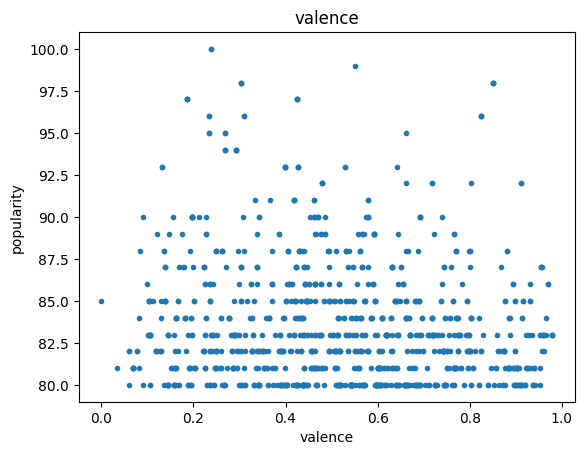

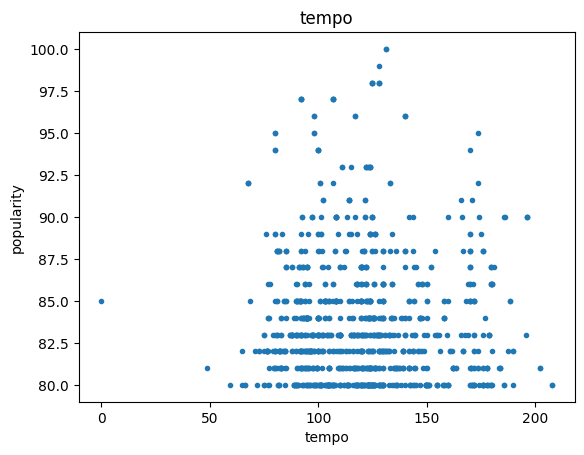

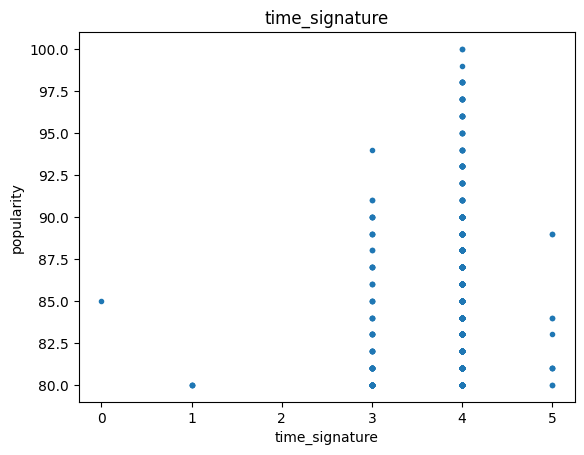

In [26]:
# cov = feature_data.cov()
rs = []
songs_data = songs_data[songs_data['popularity'] >= 80]


for feature in features:
       plt.figure();
       r = stats.linregress(songs_data['popularity'], songs_data[feature])
       
       rs.append((feature, r.rvalue))
       

       plt.plot(songs_data[feature], songs_data['popularity'], '.');
       
       plt.title(feature);
       plt.xlabel(feature);
       plt.ylabel('popularity');
       plt.savefig('../images/{}'.format(feature));
    

rData = pd.DataFrame(rs, columns=['feature', 'correlation'])
rData.sort_values('correlation', ascending=False)